**Q3. Problem 3 (25 Points): Implementing Label Propagation with Self-Training**

In this problem, we will incorporate self-training into label propagation (using energy minimization) to classify handwritten digits.

We start by learning a label propagation model with only 10 labeled points, then we select the top 5 most confident points to label. Next, we train with 15 labeled points (original 10 + 5 new ones). We repeat this process 4 times to have a model trained with 30 labeled examples. 

Please report accuracy and confusion matrix after learning each model.



The sample code to load the digit dataset is as follows:

In [1]:
import numpy as np
from sklearn import datasets

digits = datasets.load_digits()
rng = np.random.RandomState(0)
indices = np.arange(len(digits.data))
rng.shuffle(indices)

X = digits.data[indices[:330]]
y = digits.target[indices[:330]]
images = digits.images[indices[:330]]
n_total_samples = len(y)
n_labeled_points = 10

Displaying the given code

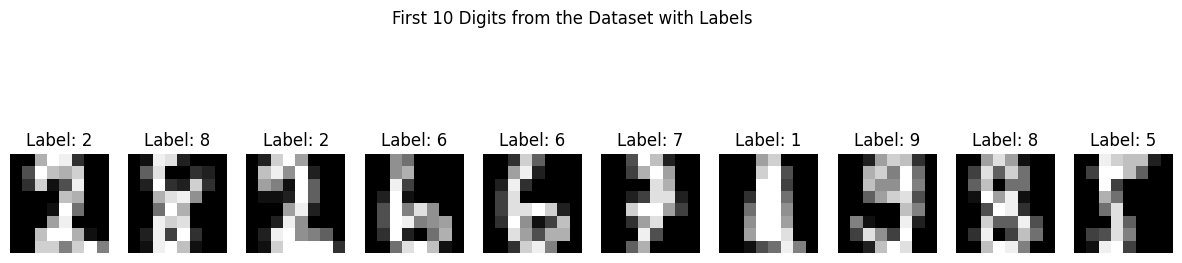

In [2]:
import matplotlib.pyplot as plt
# Display the first 10 images and their labels
fig, axes = plt.subplots(1, 10, figsize=(15, 4))
for i, ax in enumerate(axes):
    ax.imshow(images[i], cmap='gray')
    ax.set_title(f'Label: {y[i]}')
    ax.axis('off')

plt.suptitle('First 10 Digits from the Dataset with Labels')
plt.show()

Creating a label propagation model

In [3]:
from sklearn.semi_supervised import LabelPropagation
from sklearn.metrics import accuracy_score, confusion_matrix


# Initialize variables for storing results
learning = []

for iteration in range(5):
    # Creating the label propagation model
    model = LabelPropagation(kernel='knn', n_neighbors=7) # using knn kernel, instead of gaussian
    
    # Use only the first n_labeled_points for training, the rest are all unlabeled
    unlabeled_idx = np.arange(n_total_samples)[n_labeled_points:]
    y_train = np.copy(y)
    y_train[unlabeled_idx] = -1  # Unlabeled data is marked as -1
    
    # Fit the model with the currently labeled points
    model.fit(X, y_train)
    
    # Predict labels for the entire dataset
    y_pred = model.transduction_
    
    # Calculate accuracy and confusion matrix
    acc = accuracy_score(y, y_pred)
    conf_matrix = confusion_matrix(y, y_pred)
    
    # Append results to the list
    learning.append((n_labeled_points, acc, conf_matrix))
    
    # Calculating the uncertainty
    epsilon = 1e-100  # Small value to avoid log(0)
    probs = model.label_distributions_[unlabeled_idx] + epsilon
    uncertainty = -np.sum(probs * np.log(probs), axis=1)
    most_uncertain = np.argsort(uncertainty)[-5:]
    most_uncertain_idx = unlabeled_idx[most_uncertain]
    
    # Select the top 5 most confident points to label and update the number of labeled points
    n_labeled_points += 5
    unlabeled_idx = np.setdiff1d(unlabeled_idx, most_uncertain_idx)
    # Update the labels for the most uncertain points
    for idx in most_uncertain_idx:
        y_train[idx] = y[idx]  # Assign the true label to the most uncertain points

    # Updating the list of unlabeled indices
    unlabeled_idx = np.setdiff1d(unlabeled_idx, most_uncertain_idx)

# Print the results for each iteration
for n, accuracy, confusion in learning:
    print(f"Number of labeled points: {n}")
    print(f"Accuracy: {accuracy:.2f}")
    print("Confusion matrix:")
    print(confusion)
    print()

c:\Users\manir\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\semi_supervised\_label_propagation.py:322: ConvergenceWarning: max_iter=1000 was reached without convergence.
  warnings.warn(
c:\Users\manir\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\semi_supervised\_label_propagation.py:322: ConvergenceWarning: max_iter=1000 was reached without convergence.
  warnings.warn(
c:\Users\manir\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\semi_supervised\_label_propagation.py:322: ConvergenceWarning: max_iter=1000 was reached without convergence.
  warnings.warn(


Number of labeled points: 10
Accuracy: 0.57
Confusion matrix:
[[ 0 24  0  0  0  0  0  0  0  0]
 [ 0  1  5  0  0  0  0  0 24  0]
 [ 0  0 31  0  0  0  0  2  0  0]
 [ 0  0  1  0  0  0 27  0  0  0]
 [ 0  0  0  0  0  0  0 27  0  0]
 [ 0  0  0  0  0 14  0  0  0 22]
 [ 0  0  0  0  0  0 42  0  0  0]
 [ 0  0  0  0  0  0  0 37  0  0]
 [ 0  0  0  0  0  0  2  0 33  0]
 [ 0  0  0  0  0  3  0  3  1 31]]

Number of labeled points: 15
Accuracy: 0.58
Confusion matrix:
[[ 0 24  0  0  0  0  0  0  0  0]
 [ 0  1  5  0  0  0  0  0 24  0]
 [ 0  0 31  0  0  0  0  2  0  0]
 [ 0  0  1  0  0  0 27  0  0  0]
 [ 0  0  0  0  0  0  0 27  0  0]
 [ 0  0  0  0  0 14  0  0  0 22]
 [ 0  0  0  0  0  0 42  0  0  0]
 [ 0  0  0  0  0  0  0 37  0  0]
 [ 0  0  0  0  0  0  1  0 34  0]
 [ 0  0  0  0  0  3  0  3  1 31]]

Number of labeled points: 20
Accuracy: 0.72
Confusion matrix:
[[24  0  0  0  0  0  0  0  0  0]
 [ 0 14  5  0  0  0  0  0 11  0]
 [ 1  0 30  0  0  0  0  2  0  0]
 [ 0  0  1  0  0  0 25  0  2  0]
 [ 0  0  0  0  0  

c:\Users\manir\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\semi_supervised\_label_propagation.py:322: ConvergenceWarning: max_iter=1000 was reached without convergence.
  warnings.warn(


Reference : https://scikit-learn.org/dev/modules/generated/sklearn.semi_supervised.LabelPropagation.html